## Multiple Features

Linear regression with multiple variables is also known as **"multivate linear regression"**.

We now introduce notation for equations where we can have any number of input variables.

- $x_j^{(i)}$ - value of feature $j$ in the $i$th training example

- $x^{(i)}$ - the input (features) of the $i$th training example

- $m$ - the number of training examples

- $n$ - the number of features

The multivariable form of the hypothesis function accomodating these multiple features is as follows:

$$ h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n $$

In order to develop intuition about this function, we can think about $\theta_0$ as the basic price of a house, $\theta_1$ as the price per square meter, $\theta_2$ as the price per floor, etc.

$x_1$ will be the number of square meters in the house, $x_2$ the number of floors, etc.

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

$$ h_{\theta}(x) = [ \theta_0 theta_1 ... \theta_n ]  \begin{bmatrix}
1 \\
a 
\end{bmatrix} 

$$

This is a vectorization of our hypothesis function for one training example.

Note that for convenience reasons, we assume $x_0^{(i)} = 1 for (i \in 1, ..., m)$. This allows us to do matrix operations with $\theta$ and $x$. Hence making the two vectors $\theta$ and $x^{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).

## Gradient Descent for Multiple Variables

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

repeat until convergence:
$$
\left\{
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_0^{(i)}
\\
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_1^{(i)}
\\
\theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)}) \bullet x_2^{(i)}
\right\}
$$

In other words:

repeat until convergence: $$
\left\{
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{j=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})\bullet x_j^{(i)} \quad for j:= 0...n
\right\}
$$

The following image compares gradient descent with one variable to gradient descent with multiple variables:

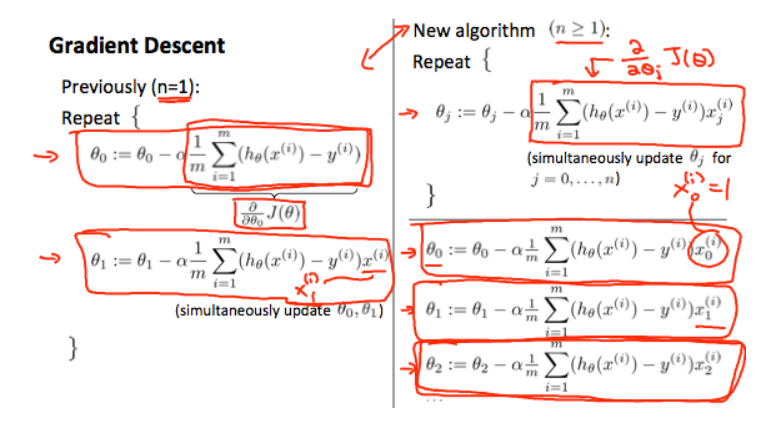